In [1]:
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_task_set_from_txt(file):
    task_set = []
    with open(file, 'r') as txtfile:
        for line in txtfile:
            task = tuple(map(int, line.strip()[1:-1].split(', ')))
            task_set.append(task)
    return task_set

In [3]:
data=read_task_set_from_txt('task_set.txt')
df = pd.DataFrame(data, columns=['id', 'execution', 'arrival', 'period', 'dead'])
df['rem']=df['execution']
df['nextdead']=df['dead']
# Print the DataFrame
print(df)

    id  execution  arrival  period  dead  rem  nextdead
0    1         13        0     413    99   13        99
1    2         18        0     304   288   18       288
2    3         12        0     474    32   12        32
3    4         13        0     161    18   13        18
4    5         12        0     324   204   12       204
5    6         22        0     162   146   22       146
6    7         13        0     499   380   13       380
7    8         15        0     380    54   15        54
8    9         19        0     327   327   19       327
9   10         13        0     139    30   13        30
10  11         14        0     371    88   14        88
11  12         13        0     460   385   13       385
12  13         30        0     282   228   30       228
13  14         11        0     467   353   11       353
14  15         26        0     312   161   26       161


In [4]:
sc=[]
for i in range(500):
        task=df[df["arrival"] <= i][df["rem"] > 0]
        if len(task)>0:
            nexttask=task.sort_values('dead').index[0]
            df.loc[nexttask, "rem"] -= 1.0
            if i > 0 and sc[-1]['id'] == df.loc[nexttask, "id"] and sc[-1]['end time'] == i:
                sc[-1]['end time'] += 1
                sc[-1]['total time'] += 1
            else:
                dict={'id': df.loc[nexttask, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                sc.append(dict)
        arrived=df[(i+1)%df['period']==0].index
        df.loc[arrived, 'rem'] = df.loc[arrived, 'execution']
        df.loc[arrived, 'nextdead'] = df.loc[arrived, 'nextdead']+df.loc[arrived,'dead']
        #print("i=",i)
        #print(df)

In [5]:
sc1=pd.DataFrame(sc)
sc1

,id,start time,end time,total time
0,4,0,13,13
1,10,13,26,13
2,3,26,38,12
3,8,38,53,15
4,11,53,67,14
5,1,67,80,13
6,6,80,102,22
7,15,102,128,26
8,5,128,139,11
9,10,139,152,13


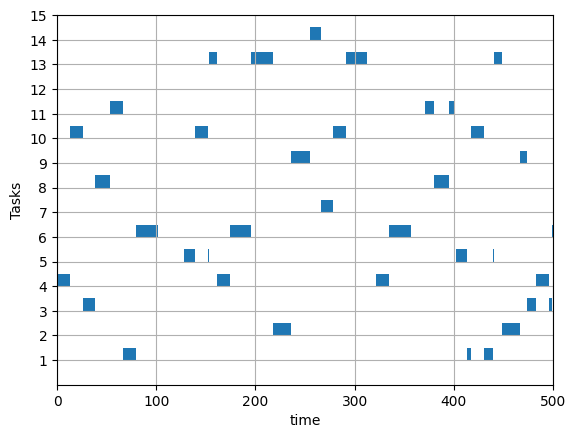

In [6]:
import matplotlib.pyplot as plt

fig, gnt = plt.subplots()

gnt.set_ylim(0, 50)
gnt.set_xlim(0, 500)
gnt.set_xlabel('time')
gnt.set_ylabel('Tasks')

tick=10
tc=[]
lab=[]
for i in df['id']:
    tc.append(tick)
    lab.append(i)
    tick+=10

gnt.set_yticks(tc)
gnt.set_yticklabels(lab)
gnt.grid(True)

for item in sc:
    gnt.broken_barh([(item['start time'], item['end time']-item['start time'])], (10*item['id'], 5), facecolors =('tab:blue'))


